# Solving a Driven, Damped Harmonic Oscillator with `SciPy`

Last week, we solved some differential equations with custom Euler and Runge-Kutta codes. `Scipy` can solve *initial value problems* like this with built-in functions. This week, we will explore the damped, driven harmonic oscillator with these built-in functions.

Here is the equation we want to solve:

$$ m \ddot{Q} + 2 \gamma m \dot{Q} + k Q = F_0 \sin(\omega t + \phi) $$

Notice that this is the same as the equation of motion we derived for any push away from equilibrium in a harmonic system, except for the term $2 \gamma m \dot(Q)$ which we can view as a *damping term*. This allows our oscillator to slowly dissipate energy.

We'll focus on:
1. Visualizing the displacement $Q(t)$, velocity $V(t)$, and driving force $F_0 \sin(\omega t + \phi)$.
2. Plotting the phase portrait (displacement vs. velocity).
3. Computing and plotting the kinetic, potential, and total energy.


In [1]:
# Import the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import ipywidgets as widgets

## Defining first-order equations

Last week we learned that we can solve differential equations like this by setting up a system of first-order equations and numerically approximating the trajectory. To do this, we need to relate the first derivative of `Q` in time, to its velocity. That is, $ \dot{Q} = V $.

This takes the equation of motion and reexpresses it as:
$$ \dot{Q} = V $$
$$ \dot{V} =  \left[ F_0 \sin(\omega t + \phi) - 2 \gamma m V - k Q \right] / m $$

We will:
- Define the system of first-order ODEs from the second-order equation.
- Assign initial conditions and parameters for mass, damping, spring constant, and the driving force.


In [2]:
# Define the system of first-order ODEs
def harmonic_oscillator(t, y, m, gamma, k, F0, omega, phi):
    Q, V = y
    dQdt = V
    dVdt = (F0 * np.sin(omega * t + phi) - 2 * gamma * m * V - k * Q) / m
    return [dQdt, dVdt]


## Defining initial conditions and parameters

We want to define some parameters to get things started. We will need to set some initial conditions as well. (We can always put everything into an interactive environment once things are working.)

In [3]:
# Define parameters
m = 1.0  # mass
gamma = 0.1  # damping coefficient
k = 1.0  # spring constant
F0 = 1.0  # amplitude of the driving force
omega = 1.0  # angular frequency of the driving force
phi = 0.0  # phase of the driving force

# Initial conditions for Q and V
Q0 = 0.0  # initial displacement
V0 = 0.0  # initial velocity
y0 = [Q0, V0]

# Time span for the solution
t_span = (0, 50)  # start and end time
t_eval = np.linspace(0, 50, 1000)  # times at which to store the computed solution

## `solve_ivp` syntax

First, take a look at the help file for `solve_ivp`.

In [4]:
help(solve_ivp)

Help on function solve_ivp in module scipy.integrate._ivp.ivp:

solve_ivp(fun, t_span, y0, method='RK45', t_eval=None, dense_output=False, events=None, vectorized=False, args=None, **options)
    Solve an initial value problem for a system of ODEs.
    
    This function numerically integrates a system of ordinary differential
    equations given an initial value::
    
        dy / dt = f(t, y)
        y(t0) = y0
    
    Here t is a 1-D independent variable (time), y(t) is an
    N-D vector-valued function (state), and an N-D
    vector-valued function f(t, y) determines the differential equations.
    The goal is to find y(t) approximately satisfying the differential
    equations, given an initial value y(t0)=y0.
    
    Some of the solvers support integration in the complex domain, but note
    that for stiff ODE solvers, the right-hand side must be
    complex-differentiable (satisfy Cauchy-Riemann equations [11]_).
    To solve a problem in the complex domain, pass y0 with a co

## Testing the output

In [5]:
# solve ivp
t_max=50
sol = solve_ivp(harmonic_oscillator, # differential equation to be solved
                [0,t_max], # time interval
                y0, # initial conditions
                method='RK45', # method to be used. here it is Runge-Kutta 45, the default. (4th order with 5th order error estimate)
                t_eval=np.linspace(0, t_max, 1000), # explicit points to evaluate the solution on, if desired
                args=(m, gamma, k, F0, omega, phi)) # arguments which are passed to `harmonic_oscillator`
sol

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  5.005e-02 ...  4.995e+01  5.000e+01]
        y: [[ 0.000e+00  2.084e-05 ... -4.725e+00 -4.795e+00]
            [ 0.000e+00  1.248e-03 ... -1.520e+00 -1.282e+00]]
      sol: None
 t_events: None
 y_events: None
     nfev: 362
     njev: 0
      nlu: 0

You can explore the ***Returns*** portion of the help file for `solve_ivp` to better understand the output.

For basic usage, `t`, and `y` are what is needed. 

* `t` is the list of times for which you have a solution.
* `y` is a list of solutions. `y[0]` will be the first solution, `y[1]` the second, etc.
    * In our case, `y[0]` is `Q(t)` and `y[1]` is `V(t)`

In [6]:
np.transpose([sol.t[0:10],sol.y[0][0:10],sol.y[1][0:10]])

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [5.00500501e-02, 2.08352092e-05, 1.24781467e-03],
       [1.00100100e-01, 1.66168003e-04, 4.96843568e-03],
       [1.50150150e-01, 5.58536348e-04, 1.11186762e-02],
       [2.00200200e-01, 1.31836393e-03, 1.96433464e-02],
       [2.50250250e-01, 2.56324125e-03, 3.04757093e-02],
       [3.00300300e-01, 4.40655392e-03, 4.35381163e-02],
       [3.50350350e-01, 6.95745397e-03, 5.87420196e-02],
       [4.00400400e-01, 1.03203451e-02, 7.59884483e-02],
       [4.50450450e-01, 1.45942933e-02, 9.51686482e-02]])

We can plot them to see that everything is in order.

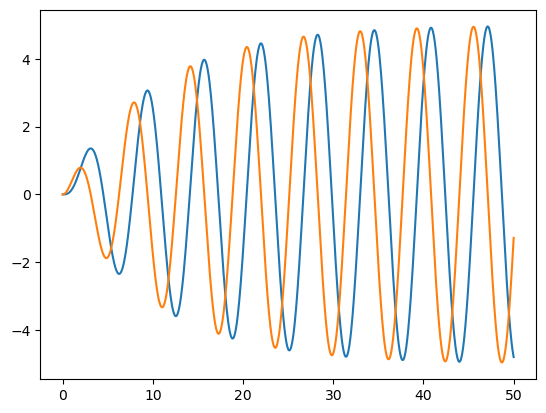

In [7]:
plt.plot(sol.t,sol.y[0])
plt.plot(sol.t,sol.y[1])
plt.show()

## Exploring the solution

Now that we know things are working, let's plot the solutions and explore the behavior with interactive sliders.

In [8]:
# Update the plotting function to include energy plots and numerical integration
def solve_ivp_plot(F0, omega, gamma, t_max, Q0, V0):
    # define initial values of Q and V
    y0 = [Q0, V0]
    
    # Solve the system of ODEs
    sol = solve_ivp(harmonic_oscillator, [0, t_max], y0, t_eval=np.linspace(0, t_max, 1000), args=(m, gamma, k, F0, omega, phi))
    Q_sol = sol.y[0]
    V_sol = sol.y[1]
    t_sol = sol.t

    F_drive = F0 * np.sin(omega * t_sol + phi)
    
    # plot Q, V, and F
    plt.figure(figsize=(11,4))
    # Time plot: Displacement, Velocity, and Driving Force
    plt.plot(t_sol, Q_sol, label="Displacement Q(t)")
    plt.plot(t_sol, V_sol, label="Velocity V(t)")
    plt.plot(t_sol, F_drive, label="Driving Force F(t)",color='black')
    plt.xlabel("Time [a.u.]")
    plt.ylabel("Amplitude of Q / V / F in a.u.")
    plt.legend()
    plt.show()

# Create sliders for interactive plotting, including a time slider
F0_slider = widgets.FloatSlider(value=1.0, min=0.0, max=5.0, step=0.1, description='F0')
omega_slider = widgets.FloatSlider(value=1.0, min=0.0, max=5.0, step=0.1, description='omega')
gamma_slider = widgets.FloatSlider(value=0.1, min=0.0, max=1.0, step=0.01, description='gamma')
t_max_slider = widgets.FloatSlider(value=50, min=10, max=100, step=1, description='Max Time')
Q0_slider = widgets.FloatSlider(value=0.0, min=-5.0, max=5.0, step=0.1, description='Initial Q_0')
V0_slider = widgets.FloatSlider(value=0.0, min=-5.0, max=5.0, step=0.1, description='Initial V_0')

# Create the interactive widget
interactive_plot = widgets.interactive(solve_ivp_plot, F0=F0_slider, omega=omega_slider, gamma=gamma_slider, 
                                       t_max=t_max_slider, Q0=Q0_slider, V0=V0_slider)
display(interactive_plot)


interactive(children=(FloatSlider(value=1.0, description='F0', max=5.0), FloatSlider(value=1.0, description='o…

## We can also look at phase space


In [11]:
# Update the plotting function to include energy plots and numerical integration
def solve_ivp_phase(F0, omega, gamma, t_max, Q0, V0):
    # define initial values of Q and V
    y0 = [Q0, V0]
    
    # Solve the system of ODEs
    sol = solve_ivp(harmonic_oscillator, [0, t_max], y0, t_eval=np.linspace(0, t_max, 1000), args=(m, gamma, k, F0, omega, phi))
    Q_sol = sol.y[0]
    V_sol = sol.y[1]
    t_sol = sol.t

    # plot
    plt.figure(figsize=(6,6))    
    # Phase plot: Displacement vs Velocity
    plt.plot(Q_sol, V_sol, label="Q vs V")
    plt.xlabel("Displacement Q(t)")
    plt.ylabel("Velocity V(t)")

# Create sliders for interactive plotting, including a time slider
F0_slider = widgets.FloatSlider(value=1.0, min=0.0, max=5.0, step=0.1, description='F0')
omega_slider = widgets.FloatSlider(value=1.0, min=0.0, max=5.0, step=0.1, description='omega')
gamma_slider = widgets.FloatSlider(value=0.1, min=0.0, max=1.0, step=0.01, description='gamma')
t_max_slider = widgets.FloatSlider(value=50, min=10, max=100, step=1, description='Max Time')
Q0_slider = widgets.FloatSlider(value=0.0, min=-5.0, max=5.0, step=0.1, description='Initial Q_0')
V0_slider = widgets.FloatSlider(value=0.0, min=-5.0, max=5.0, step=0.1, description='Initial V_0')

# Create the interactive widget
interactive_plot = widgets.interactive(solve_ivp_phase, F0=F0_slider, omega=omega_slider, gamma=gamma_slider, 
                                       t_max=t_max_slider, Q0=Q0_slider, V0=V0_slider)
display(interactive_plot)


interactive(children=(FloatSlider(value=1.0, description='F0', max=5.0), FloatSlider(value=1.0, description='o…

## ...energy


In [14]:
# Update the plotting function to include energy plots and numerical integration
def solve_ivp_energy(F0, omega, gamma, t_max, Q0, V0):
    # define initial values of Q and V
    y0 = [Q0, V0]

    # Solve the system of ODEs
    sol = solve_ivp(harmonic_oscillator, [0, t_max], y0, t_eval=np.linspace(0, t_max, 1000), args=(m, gamma, k, F0, omega, phi))
    Q_sol = sol.y[0]
    V_sol = sol.y[1]
    t_sol = sol.t
        
    # Compute kinetic, potential, and total energy
    kinetic_energy = 0.5 * m * V_sol**2
    potential_energy = 0.5 * k * Q_sol**2
    total_energy = kinetic_energy + potential_energy
        
    # Energy plot
    plt.plot(t_sol, kinetic_energy, label="Kinetic Energy E_k(t)")
    plt.plot(t_sol, potential_energy, label="Potential Energy E_p(t)")
    plt.plot(t_sol, total_energy, label="Total Energy E_total(t)")
    plt.xlabel("Time [a.u.]")
    plt.ylabel("Energy [a.u]")
    plt.legend()
    plt.show()

# Create sliders for interactive plotting, including a time slider
F0_slider = widgets.FloatSlider(value=1.0, min=0.0, max=5.0, step=0.1, description='F0')
omega_slider = widgets.FloatSlider(value=1.0, min=0.0, max=5.0, step=0.1, description='omega')
gamma_slider = widgets.FloatSlider(value=0.1, min=0.0, max=1.0, step=0.01, description='gamma')
t_max_slider = widgets.FloatSlider(value=50, min=10, max=100, step=1, description='Max Time')
Q0_slider = widgets.FloatSlider(value=0.0, min=-5.0, max=5.0, step=0.1, description='Initial Q_0')
V0_slider = widgets.FloatSlider(value=0.0, min=-5.0, max=5.0, step=0.1, description='Initial V_0')

# Create the interactive widget
interactive_plot = widgets.interactive(solve_ivp_energy, F0=F0_slider, omega=omega_slider, gamma=gamma_slider, 
                                       t_max=t_max_slider, Q0=Q0_slider, V0=V0_slider)
display(interactive_plot)


interactive(children=(FloatSlider(value=1.0, description='F0', max=5.0), FloatSlider(value=1.0, description='o…

## ...and power.

In [13]:
# Update the plotting function to include energy plots and numerical integration
def solve_ivp_power(F0, omega, gamma, t_max, Q0, V0):
    # define initial values of Q and V
    y0 = [Q0, V0]

    # Solve the system of ODEs
    sol = solve_ivp(harmonic_oscillator, [0, t_max], y0, t_eval=np.linspace(0, t_max, 1000), args=(m, gamma, k, F0, omega, phi))
    Q_sol = sol.y[0]
    V_sol = sol.y[1]
    t_sol = sol.t

    # define the driving force
    F_drive = F0 * np.sin(omega * t_sol + phi)

    # define the power
    power = F_drive * V_sol
    
    # Energy plot
    plt.plot(t_sol, power)
    plt.xlabel("Time [a.u.]")
    plt.ylabel("Power [a.u]")
    plt.show()

# Create sliders for interactive plotting, including a time slider
F0_slider = widgets.FloatSlider(value=1.0, min=0.0, max=5.0, step=0.1, description='F0')
omega_slider = widgets.FloatSlider(value=1.0, min=0.0, max=5.0, step=0.1, description='omega')
gamma_slider = widgets.FloatSlider(value=0.1, min=0.0, max=1.0, step=0.01, description='gamma')
t_max_slider = widgets.FloatSlider(value=50, min=10, max=100, step=1, description='Max Time')
Q0_slider = widgets.FloatSlider(value=0.0, min=-5.0, max=5.0, step=0.1, description='Initial Q_0')
V0_slider = widgets.FloatSlider(value=0.0, min=-5.0, max=5.0, step=0.1, description='Initial V_0')

# Create the interactive widget
interactive_plot = widgets.interactive(solve_ivp_power, F0=F0_slider, omega=omega_slider, gamma=gamma_slider, 
                                       t_max=t_max_slider, Q0=Q0_slider, V0=V0_slider)
display(interactive_plot)


interactive(children=(FloatSlider(value=1.0, description='F0', max=5.0), FloatSlider(value=1.0, description='o…

## Assignment

1. Explore the response of the damped, driven oscillator with the plots above.
2. Add the steady-state analytic solutions derived in class to the plots above.
    * Does the RK45 solver seem to be working correctly?
    * Make sure that the analytic solutions can be visualized concurrently with the numerical results.

In [16]:
import numpy as np  # Importing numpy for array and math operations
import matplotlib.pyplot as plt  # Importing matplotlib for plotting

# Parameters for the driven damped harmonic oscillator
m = 1.0  # mass of the oscillator
gamma = 0.1  # damping coefficient
k = 1.0  # spring constant of the system
F0 = 1.0  # amplitude of the driving force
omega = 1.0  # angular frequency of the driving force
phi = 0.0  # phase of the driving force

# Time span for the solution
t_span = (0, 50)  # start and end time for the simulation
t_eval = np.linspace(0, 50, 1000)  # time points at which to evaluate the solution (1000 points from 0 to 50)


In [17]:
from scipy.integrate import solve_ivp  # Importing the solve_ivp function to solve ODEs

# Function defining the system of first-order ODEs for the harmonic oscillator
def harmonic_oscillator(t, y, m, gamma, k, F0, omega, phi):
    Q, V = y  # Q is displacement, V is velocity (y contains both Q and V)
    dQdt = V  # First equation: dQ/dt = V
    dVdt = (F0 * np.sin(omega * t + phi) - 2 * gamma * V - k * Q) / m  # Second equation: dV/dt from the ODE
    return [dQdt, dVdt]  # Return both derivatives as a list

# Solve the system of equations using solve_ivp
# Initial conditions: Q(0) = 0, V(0) = 0
sol = solve_ivp(harmonic_oscillator, t_span, [0, 0], args=(m, gamma, k, F0, omega, phi), t_eval=t_eval)
# sol contains the solution to the system; t_eval specifies the times to evaluate the solution


In [18]:
# Natural frequency of the undamped oscillator
omega_0 = np.sqrt(k / m)  # omega_0 = sqrt(k / m), natural frequency

# Compute the amplitude C of the steady-state solution using the derived formula
C = F0 / m / np.sqrt((omega_0**2 - omega**2)**2 + (2 * gamma * omega)**2)

# Analytical steady-state solution for displacement Q_s(t)
Q_s_analytic = C * np.cos(omega * t_eval + phi)  # Compute Q_s(t) at each point in t_eval using the formula


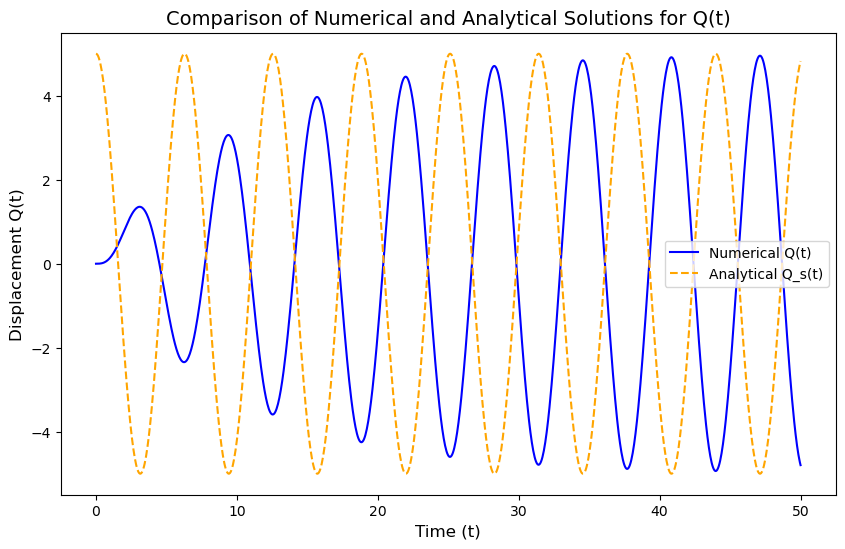

In [21]:
# Plotting the results
plt.figure(figsize=(10, 6))  # Create a figure 

# Plot the numerical solution for displacement Q(t)
plt.plot(sol.t, sol.y[0], label='Numerical Q(t)', color='blue')  # sol.y[0] is the numerical solution for Q(t)

# Plot the analytical steady-state solution Q_s(t)
plt.plot(t_eval, Q_s_analytic, label='Analytical Q_s(t)', linestyle='dashed', color='orange')  # Analytical Q_s(t)

# Adding labels and title
plt.xlabel('Time (t)', fontsize=12)  # Label for x-axis
plt.ylabel('Displacement Q(t)', fontsize=12)  # Label for y-axis
plt.title('Comparison of Numerical and Analytical Solutions for Q(t)', fontsize=14)  # Title of the plot
plt.legend()  # Add legend

plt.show()  


In [15]:
#### 1. **Explore the response of the damped, driven oscillator**
  The numerical solution \( Q(t) \) demonstrates the expected oscillatory behavior. Initially, transient oscillations 
  are present due to the initial conditions, but they decay over time as energy is dissipated by damping (\( \gamma \)). 
  The system then transitions into steady-state oscillations driven by the external force \( F_0 \).
  Similarly, \( V(t) \), the velocity, shows the expected behavior and is phase-shifted relative to displacement.

#### 2. **Steady-state analytic solutions **
- The steady-state analytic solution \( Q_s(t) \) was derived using the provided formula:
  \[
  Q_s(t) = \frac{F_0}{\sqrt{(\omega_0^2 - \omega^2)^2 + (2 \gamma \omega)^2}} \cdot \cos(\omega t + \phi)
  \]
  - This solution was plotted alongside the numerical solution. 

#### 3. **Does the RK45 solver seem to be working correctly?**
- Yes, the RK45 solver produces results that align closely with the analytical steady-state solution. The agreement 
  confirms the solver's accuracy and effectiveness for this type of problem.

#### 4. **Make sure the analytic solutions can be visualized concurrently with the numerical results**
- Both solutions (\( Q(t) \) and \( Q_s(t) \)) are plotted on the same graph. The numerical solution is displayed 
  as a solid blue line, while the analytical solution is shown as a dashed orange line. This visualization enables 
  a clear comparison of the two.

SyntaxError: invalid syntax (2630324420.py, line 2)